# 用梯度下降法做多变量线性回归

Data: <br/>
features--Size, Bedrooms <br/>
Response--Price

In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity='all'

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### 数据预处理

In [3]:
#input data 
data = pd.read_table("data.txt", header=None, sep=",", names=["Size","Bedrooms","Price"])
data.head()

Size  Bedrooms   Price
0  2104         3  399900
1  1600         3  329900
2  2400         3  369000
3  1416         2  232000
4  3000         4  539900

In [4]:
#查看数据
data.info()
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47 entries, 0 to 46
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   Size      47 non-null     int64
 1   Bedrooms  47 non-null     int64
 2   Price     47 non-null     int64
dtypes: int64(3)
memory usage: 1.2 KB


Size   Bedrooms          Price
count    47.000000  47.000000      47.000000
mean   2000.680851   3.170213  340412.659574
std     794.702354   0.760982  125039.899586
min     852.000000   1.000000  169900.000000
25%    1432.000000   3.000000  249900.000000
50%    1888.000000   3.000000  299900.000000
75%    2269.000000   4.000000  384450.000000
max    4478.000000   5.000000  699900.000000

In [5]:
#feature scaling
data.iloc[:,0:2] = (data.iloc[:,0:2] - data.iloc[:,0:2].mean()) / data.iloc[:,0:2].std()
data.head()

Size  Bedrooms   Price
0  0.130010 -0.223675  399900
1 -0.504190 -0.223675  329900
2  0.502476 -0.223675  369000
3 -0.735723 -1.537767  232000
4  1.257476  1.090417  539900

选择hypothesis: h(x)=theta0+theta1*X1+theta2*X2

### 初始化变量

In [26]:
#在data.frame前插入一列1
data.insert(0,"X0",1)

In [27]:
#set X, y and theta
cols = data.shape[1] #列数
X = data.iloc[:,0:cols-1]
y = data.iloc[:,cols-1:cols]
theta = np.matrix([0,0,0])

In [28]:
# transform X and y into matrix
X = np.matrix(X.values)
y = np.matrix(y.values)

In [30]:
X.shape, y.shape, theta.shape

((47, 3), (47, 1), (1, 3))

### 计算Cost function

In [31]:
def computeCost(X,y,theta):
    inner = np.power(((X * theta.T) - y), 2)
    Cost = np.sum(inner)/(2*len(X))
    return Cost

In [32]:
computeCost(X,y,theta)

65591548106.45744

### Gradient descent

In [33]:
def gradientDescent(X,y,theta,alpha,iteration):
    temp = np.matrix(np.zeros(theta.shape)) # 初始化一个临时向量，用来存theta的值
    cost = list() #创建一个空列表
    m = X.shape[0] #sample size
    for i in range(iteration):
        temp = theta - (alpha/m)*(X * theta.T - y).T * X
        theta = temp
        cost.append(computeCost(X,y,theta))
    return theta, cost

In [42]:
#初始化学习速率和迭代次数
alpha = 0.1
iteration = 50

In [43]:
#应用函数
[final_theta,cost] = gradientDescent(X,y,theta,alpha,iteration)

In [44]:
final_theta #parameter estimator 

matrix([[ 3.38658249e+05,  1.04127516e+05, -1.72205334e+02]])

### Draw plot to select iteration times 

Text(0.5, 0, 'Iterations')

Text(0, 0.5, 'Cost')

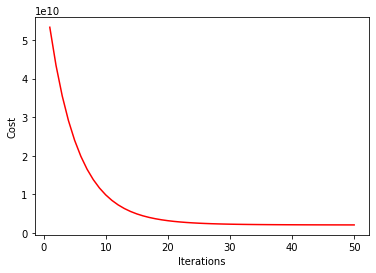

In [47]:
plt.plot(list(range(1,iteration+1)),cost,"r")
plt.xlabel("Iterations")
plt.ylabel("Cost")

So maybe 20 is a good choice for iteration when alpha is 0.1